# Unsupervised Clustering

In [2]:
import psycopg2
import pandas as pd
import sys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn import cluster

import numpy as np
from scipy.stats import kde
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
from sklearn.preprocessing import scale

from sklearn.mixture import GaussianMixture
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

sns.set_style("whitegrid", {'axes.grid' : False})


## Survey results

       mood_label  value
0        peaceful  15.29
1          lively  12.35
2         serious  11.76
3        yearning   9.41
4        brooding   9.41
5      melancholy   8.24
6        stirring   7.06
7          somber   4.12
8       easygoing   4.12
9          tender   3.53
10        sensual   2.94
11         urgent   2.94
12    sentimental   2.35
13     empowering   2.35
14  sophisticated   1.76
15       romantic   1.18
16          fiery   1.18
(17, 2)


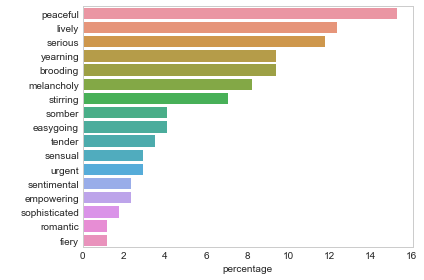

In [3]:
Survey_data = {"mood_label": ["peaceful", "lively", "serious", "yearning", "brooding", 
                              "melancholy", "stirring", "somber", "easygoing", "tender",
                               "sensual", "urgent", "sentimental", "empowering", "sophisticated",
                               "romantic", "fiery"],
               "value":[15.29, 12.35, 11.76, 9.41, 9.41, 8.24, 7.06, 4.12, 4.12, 3.53, 
                        2.94, 2.94, 2.35, 2.35, 1.76, 1.18, 1.18]}

Survey_data = pd.DataFrame.from_dict(Survey_data)
print(Survey_data)
print(Survey_data.shape)
sns.barplot(y = 'mood_label', x = 'value', data = Survey_data)

plt.xlabel('percentage')
plt.ylabel(" ")

plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/SatyamSurvey.jpg', dpi = 300)

In [4]:
import copy

Survey_data = {"mood_label": ["Peaceful", "Lively", "Serious", "Yearning", "Brooding", 
                              "Melancholy", "Stirring", "Somber", "Easygoing", "Tender",
                               "Sensual", "Urgent", "Sentimental", "Empowering", "Sophisticated",
                               "Romantic", "Fiery", "Gritty", "Rowdy", "Aggressive", 
                              "Excited", "Upbeat", "Energizing", "Cool", "Defiant"],
               "value":[15.29, 12.35, 11.76, 9.41, 9.41, 8.24, 7.06, 4.12, 4.12, 3.53, 
                        2.94, 2.94, 2.35, 2.35, 1.76, 1.18, 1.18, 0.0, 0.0, 0.0, 
                        0.0, 0.0, 0.0, 0.0, 0.0]}

Survey_data = pd.DataFrame.from_dict(Survey_data)
Survey_data['type'] = 'survey'
# print(Survey_data)

##
# Peaceful is most prominent mood
con = get_db_handle()
querystr = "select * from ragafeaturedb"
df = query_db_translate_to_pandas(con, querystr)
df_dist = df[['id', 'gn_mood_1']].groupby(['gn_mood_1']).aggregate('count').sort_values('id').reset_index()
df_dist = df_dist.sort_values('id', ascending= False)
df_dist['id'] = df_dist['id']/(df_dist['id'].sum())*100
percentage = []
for x in df_dist['id'].as_matrix():
    percentage.append(x*100/(np.sum(df_dist['id'].as_matrix())))
# print(percentage)


df_dist.columns = [['mood_label', 'value']]
df_dist['type'] = 'data'
print(df_dist.columns)


df_joint = copy.deepcopy(Survey_data)
print(df_joint)
df_joint = df_joint.append(df_dist)
print(df_joint)


df_joint = df_joint.sort_values("value", ascending= False)
# print(Survey_data.shape)
# # print(Survey_data)
sns.barplot(y = 'mood_label', x = 'value', data = df_joint, hue ='type')
# # plt.xticks(rotation=90);
plt.xlabel('percentage')
plt.ylabel(" ")
# # axis_label = ['0', '10', '20', '30', '40', '50', '60', '70']
# # plt.xticks(np.arange(0,70, 10), axis_label )

plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/SurveyData.jpg', dpi = 300)

NameError: name 'get_db_handle' is not defined

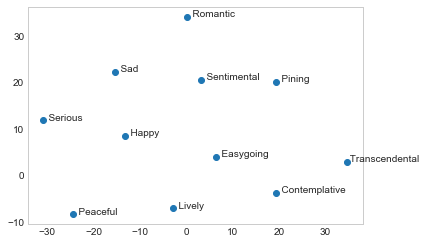

In [140]:
# word2vec translation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})


Word2vecDict = {"peaceful": [-24.36605453 , -8.33853722], "romantic": [  0.15409328 , 34.14270782], 
                  "sentimental": [  3.13135362 , 20.55255508], "easygoing": [ 6.32650948 ,  3.99945426],
                  "serious": [-30.93254852 , 11.86685181], "lively": [ -2.91236734 , -7.01064205],
                  "happy": [-13.2174015  , 8.48174477],  "contemplative": [ 19.38446617 , -3.74292302],
                  "transcendental":  [ 34.77344131  , 3.00777721], "pining": [ 19.39132118 , 20.17468834],
                  "sad": [-15.31364918 , 22.28489304]}

# Word2vecDf = pd.DataFrame(Word2vecDict)
# print(type(Word2vecDf[:1]))
# sns.jointplot(x = Word2vecDf[:1] , y = Word2vecDf[:2], data = Word2vecDf)
list2d = [[-24.36605453,  -8.33853722], [  0.15409328,  34.14270782], [  3.13135362,  20.55255508], 
        [  6.32650948 ,  3.99945426], [-30.93254852 , 11.86685181], [ -2.91236734 , -7.01064205],
        [-13.2174015  ,  8.48174477], [ 19.38446617 , -3.74292302], [ 34.77344131 ,  3.00777721],
        [ 19.39132118 , 20.17468834], [-15.31364918 , 22.28489304]]
moodlist = ["  Peaceful ", "  Romantic ", "  Sentimental ", "  Easygoing", "  Serious ",
            "  Lively ", "  Happy ", "  Contemplative", " Transcendental", "  Pining ","  Sad "]

mm2d = np.asarray(list2d, dtype=np.float32)
fig, ax = plt.subplots()
z = mm2d[:,0]
y = mm2d[:,1]
ax.scatter(z, y)
if moodlist is not None:
    for i, txt in enumerate(moodlist):
        ax.annotate(txt, (z[i], y[i]))
        
# plt.tight_layout()
plt.savefig('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/IndianClassicalMusic/Week3/MyLabels.jpg', dpi = 300)


### Mega-survey

In [5]:
df_ms = pd.read_csv('/Users/feelharmonic/Dropbox/Insight2018/SaReGaMood/allsurvey.txt', delimiter = '###')
df_ms.columns = [['id', 'my_mood_1', 'name', 'url', 'sp_features', 'gn_mood_1']]
print(df_ms.head)
# 'sp_danceability', 'sp_energy', 'sp_loudness', sp_speechiness', 'sp_acousticness','sp_instrumentalness', 'sp_liveness', 'sp_valence', 'sp_tempo',

<bound method NDFrame.head of                          id       my_mood_1  \
0    7CT90XmUBieUFF8haFYMox          pining   
1    3lGuHmSwTTtAFIcvmvjSPf          pining   
2    71mdiZsiSVMa2y5xlimUgS       easygoing   
3    35Kv3bqmJWIugl9KiPGqKN          pining   
4    1mtyHGOeWRJf7JdXfcxcRb           happy   
5    79T9MIsbJ6e1svRiYLFavy        peaceful   
6    3fiUiC9Yn5ijmHhYpJewyC   contemplative   
7    5wmsKWenvDnKwQ8wjEPk8e     sentimental   
8    1kGPuGQSokgBLpdDqyp6z8       easygoing   
9    1BMBCIyjKlP8jpQJdUz8DC        peaceful   
10   4WVVrYpYBpTyP0LGeS42e0        peaceful   
11   5pfsAqdYrGREAUG3JCj8wv          pining   
12   7HeyyjrWzyQTXSXA4KnaIT           happy   
13   7tomD8tiHHM7L3Ab9CKx4W           happy   
14   48eVr7P5g5GI4INEmFZIEt         serious   
15   3KZazBBOi6S6E7K6nr5BWg   contemplative   
16   5I9WBiAOOhpKVAZnjLio5N   contemplative   
17   4JJIMBSDD0zYP3oc0r0JVU        peaceful   
18   1fHy82EnT2dWF9EI0H66ZQ        romantic   
19   112n7effRKMNrWtrvZAnvx   

### Functions to query the databases

In [6]:
# create connection
def get_db_handle(dbname="testdb", rolename ="spotify"):
    con = None
    constr = "host='localhost' dbname='"+dbname+"'  user='"+rolename+"' password='ics'"
    try:
        con = psycopg2.connect(constr)
    except Exception as e:
        if con: 
            con.rollback()
        print('Error creating or connecting handle', str(e))
        sys.exit(1)
    if con is None:
        print('Error creating handle', str(e))
        sys.exit(1)
    return con

In [7]:
# open a cursor and fetch db to a pandas dataframe
def query_db_translate_to_pandas(con, querystring):
    df = None
    try:
        cur = con.cursor()
        df = pd.read_sql(querystring, con)
    except Exception as e:
        con.rollback() # meaning break the connection safely
        print("Error in printing table", str(e))
    return df

In [8]:
def close_db(handle1):
    if handle1:
        handle1.close()
    return

### Get data from Alltracks 

In [9]:
con = get_db_handle()
print(con)
querystr = "select * from alltracks"
df = query_db_translate_to_pandas(con, querystr)
df.columns


<connection object at 0x1a17a556b0; dsn: 'user=spotify password=xxx dbname=testdb host=localhost', closed: 0>


Index(['id', 'name', 'uri', 'url', 'duration_ms', 'href', 'artist_id',
       'artist_name', 'artist_url', 'album_id', 'album_name', 'album_url'],
      dtype='object')

### Get data from Ragafeaturedb

In [10]:
con = get_db_handle()
querystr = "select * from ragafeaturedb"
    #where name like \'%Shri%\'"
df = query_db_translate_to_pandas(con, querystr)
print(df.columns)

Index(['id', 'name', 'url', 'sp_danceability', 'sp_energy', 'sp_key',
       'sp_loudness', 'sp_mode', 'sp_speechiness', 'sp_acousticness',
       'sp_instrumentalness', 'sp_liveness', 'sp_valence', 'sp_tempo',
       'gn_gnid', 'gn_genre_1', 'gn_genre_2', 'gn_genre_3', 'gn_mood_1',
       'gn_mood_2', 'gn_tempo_1', 'gn_tempo_2', 'gn_tempo_3'],
      dtype='object')


## Unsupervised Clustering on SPotify data

In [12]:
df_allData = df
X = df_allData[["sp_valence", "sp_energy", "sp_danceability", "sp_speechiness", "sp_acousticness", "sp_instrumentalness", "sp_tempo"]].astype('float64') 
#'sp_danceability', 'sp_energy', 'sp_key',
X = X.as_matrix(columns=None) #imports X as numpy matrix

from sklearn.preprocessing import normalize
normed_X = normalize(X, axis=1, norm='l1')

X_allData = X

print(X.sum(axis=0))


[  2.41000670e+03   2.90977073e+03   2.61349310e+03   3.88749100e+02
   5.38532953e+03   2.97738898e+03   8.22853097e+05]


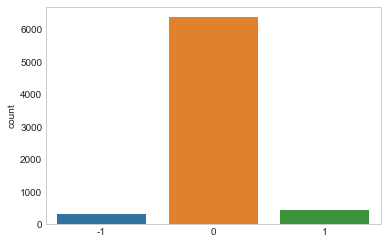

In [15]:
#  HDBSCAN on the full thing

import hdbscan

data = X

clusterer = hdbscan.HDBSCAN(min_cluster_size= 100)
cluster_labels = clusterer.fit_predict(data)
sns.countplot(cluster_labels)

## (1) reducing the feature space to 2D and then clustering 
# (a) T-SNE
reduces the 8-dimensional features to 2D non-linearly.

In [16]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(X)
X_embedded.shape

(7115, 2)

In [17]:
# %store X_embedded
%store -r

In [18]:
print(X_embedded)
X_embedded_df = pd.DataFrame(data=X_embedded)

[[-27.87680435  -1.94313884]
 [ 45.35924911  33.40933609]
 [-26.83104134  34.02323914]
 ..., 
 [ 72.02928925  -3.21536779]
 [-82.9602356  -13.30767918]
 [ 50.26560593  48.73444748]]


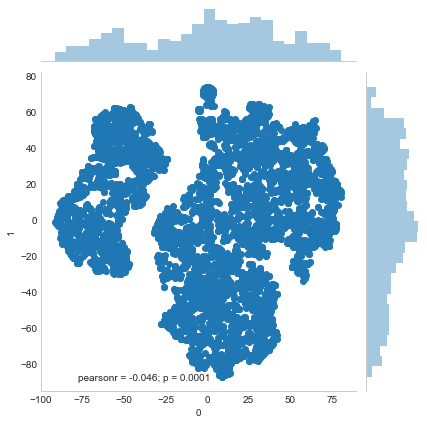

In [19]:
sns.jointplot(x = X_embedded_df[0], y = X_embedded_df[1], data = X_embedded_df)

## b. PCA


(7115, 7)
<class 'numpy.ndarray'>


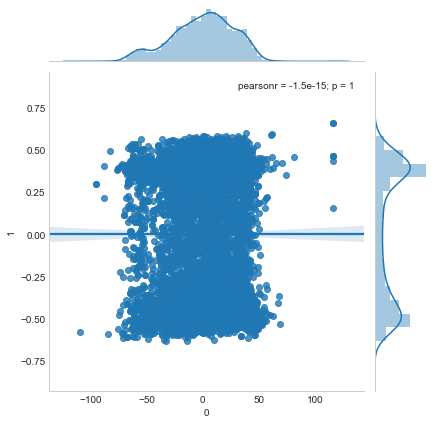

In [20]:
from sklearn.decomposition import PCA
print(X.shape)
pca = PCA(n_components=4)
X_PCA = pca.fit(X).transform(X)
print(type(X_PCA))
X_myPCA = pd.DataFrame(data=X_PCA)
sns.jointplot(x = X_myPCA[0], y = X_myPCA[1], data = X_myPCA, kind = 'reg')

In [21]:
print(X_myPCA.shape)

(7115, 4)


11 0.512722721961
[ 0  0  0 ..., 10 10 10]
[[  1.74006153e+00   1.10937503e-02   4.32701697e-02   1.45018133e-02]
 [ -3.34442597e+01  -2.93079683e-02   5.73135493e-02  -1.78823449e-02]
 [  3.38625853e+01   3.56540313e-02  -4.46206068e-02   1.36568949e-03]
 [ -6.32816459e+01   1.62315639e-02  -1.01778166e-01   2.34819814e-02]
 [  2.19234384e+01  -7.92709305e-03   4.88522967e-02  -6.00784094e-03]
 [ -2.06213432e+01   3.41424059e-02  -2.80295574e-02  -7.70870565e-03]
 [  4.55388661e+01  -4.91275315e-02  -1.30090044e-01  -3.78735491e-02]
 [  1.15604936e+01  -6.55741146e-03   4.16151996e-02   5.93019686e-03]
 [  1.11394103e+02   4.69857345e-01  -1.81178959e-01   2.65147968e-01]
 [ -8.90509477e+00  -2.70883041e-02  -4.38262611e-03   1.52226703e-02]
 [ -4.99131933e+01  -5.42860854e-03  -4.91289877e-02  -2.33416127e-02]]


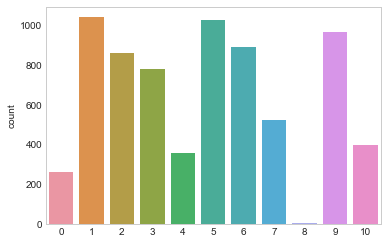

In [22]:
# K-means clustering on the IND dataset
# takes n_clusters as input

Y = X_myPCA
# print(X.shape)

# for n in range(10):
n_clusters = 11
k_means = cluster.KMeans(n_clusters)
k_means.fit(Y) 
y_kmeans = k_means.predict(Y)

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(Y)
silhouette_avg = silhouette_score(Y, cluster_labels)
print(n_clusters, silhouette_avg)
cluster_labels = np.sort(cluster_labels)
print(cluster_labels)
sns.countplot(cluster_labels)
print(k_means.cluster_centers_)

In [23]:
# computing eigenvalues for PCA

import numpy as np
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)
cov_mat = np.cov(X.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %sorted(eig_vals/sum(eig_vals), reverse = True))

# We will pick first four dimensions


Eigenvalues 
[0.99961677062865706, 0.00019984631631446832, 9.8286926647572694e-05, 4.406159417203013e-05, 2.5217303739572362e-05, 1.3683623252926701e-05, 2.1336072163461338e-06]


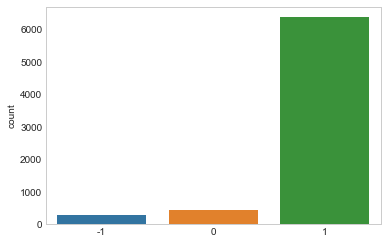

In [24]:
#  HDBSCAN on the PCA output

import hdbscan

data = X_myPCA

clusterer = hdbscan.HDBSCAN(min_cluster_size= 100)
cluster_labels = clusterer.fit_predict(data)
sns.countplot(cluster_labels)
# print(outlier_scores_)

In [25]:
# Affinity propagation on PCA output
af = AffinityPropagation(damping = 0.7, max_iter=200, convergence_iter=15, preference=-40).fit(X_myPCA)
#af = AffinityPropagation(damping = 0.7, max_iter=200, convergence_iter=15).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 85
Silhouette Coefficient: 0.494


## a.1 HDBSCAN

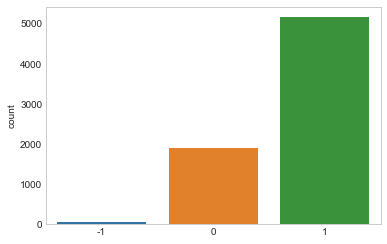

In [26]:
import hdbscan

data = X_embedded_df

clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
cluster_labels = clusterer.fit_predict(data)
sns.countplot(cluster_labels)

## a.2 GMM on reduced 2D

[[  0.00000000e+00   1.45565473e+05]
 [  1.00000000e+00   1.43760309e+05]
 [  2.00000000e+00   1.42430593e+05]
 [  3.00000000e+00   1.41977902e+05]
 [  4.00000000e+00   1.41641584e+05]
 [  5.00000000e+00   1.40726292e+05]
 [  6.00000000e+00   1.40575151e+05]
 [  7.00000000e+00   1.40592828e+05]
 [  8.00000000e+00   1.40553603e+05]
 [  9.00000000e+00   1.40141039e+05]
 [  1.00000000e+01   1.40335038e+05]
 [  1.10000000e+01   1.40297758e+05]
 [  1.20000000e+01   1.39733934e+05]
 [  1.30000000e+01   1.39829690e+05]
 [  1.40000000e+01   1.39743455e+05]
 [  1.50000000e+01   1.39544747e+05]
 [  1.60000000e+01   1.39301683e+05]
 [  1.70000000e+01   1.39394501e+05]
 [  1.80000000e+01   1.39280293e+05]
 [  1.90000000e+01   1.39132701e+05]
 [  2.00000000e+01   1.39103047e+05]
 [  2.10000000e+01   1.39344243e+05]
 [  2.20000000e+01   1.39080584e+05]
 [  2.30000000e+01   1.39057055e+05]
 [  2.40000000e+01   1.38989901e+05]
 [  2.50000000e+01   1.38938039e+05]
 [  2.60000000e+01   1.39010587e+05]
 

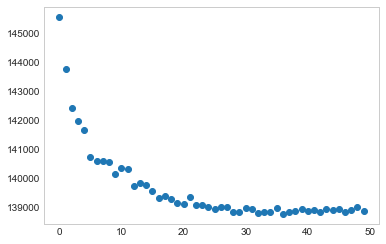

In [74]:
# DIAG
bic_matrix = np.zeros(shape = (50, 2))
for n_cluster in range(50):
    gmm = GaussianMixture(n_components= n_cluster+1, covariance_type='diag').fit(X_embedded_df)
    labels = gmm.predict(X_embedded_df)
    bic_matrix[n_cluster] = [n_cluster, gmm.bic(X_embedded_df)]
plt.scatter(bic_matrix[:,0], bic_matrix[:,1])
print(bic_matrix)

In [37]:
%store gmm
%store labels

Stored 'gmm' (GaussianMixture)
Stored 'labels' (ndarray)


In [62]:
X_mydf = X_embedded_df.as_matrix()

In [75]:
probs = gmm.predict_proba(X_mydf)
print(probs[:5].round(3))

[[ 0.     0.     0.     0.014  0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.006  0.008  0.     0.356  0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.227  0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.389  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.681  0.     0.     0.     0.     0.
   0.     0.     0.017  0.     0.     0.     0.     0.188  0.     0.     0.
   0.     0.     0.     0.     0.057  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.056  0.
   0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.691  0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.032  0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0

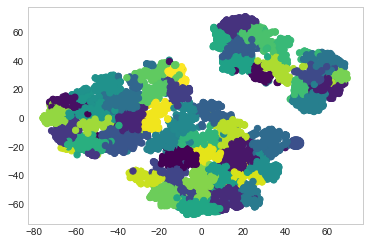

In [76]:
plt.scatter(X_mydf[:,0], X_mydf[:,1], c=labels, s=40, cmap ='viridis')

## (2) Working on full data from Spotify
# (a) Affinity Propagation

In [26]:
af = AffinityPropagation(damping = 0.7, max_iter=200, convergence_iter=15, preference=-15).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 22
Silhouette Coefficient: 0.216


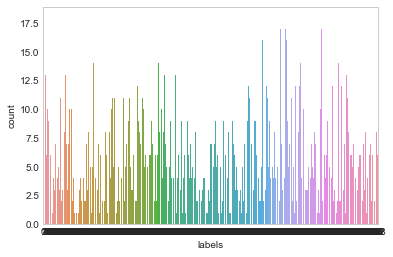

In [29]:
df_allData[['labels']] = pd.DataFrame(labels)

# compute distribution; get indices of all points classified as peaceful
peaceful_labels = df_allData[df_allData['gn_mood_1']== "Peaceful"]['labels']
sns.countplot(peaceful_labels)

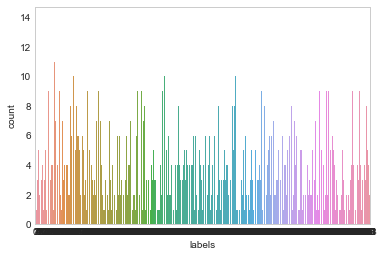

In [32]:
# get indices of all points classified as serious
serious_labels = df_allData[df_allData['gn_mood_1']== "Serious"]['labels']
sns.countplot(serious_labels)

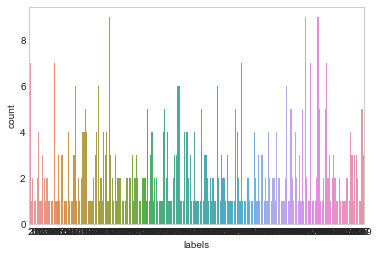

In [33]:
# get indices of all points classified as fiery
fiery_labels = df_allData[df_allData['gn_mood_1']== "Fiery"]['labels']
sns.countplot(fiery_labels)

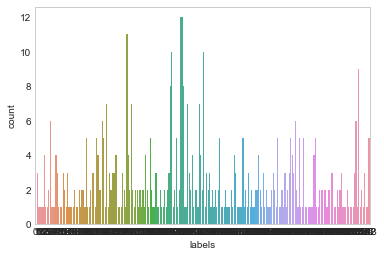

In [34]:
# get indices of all points classified as somber
somber_labels = df_allData[df_allData['gn_mood_1']== "Somber"]['labels']
sns.countplot(somber_labels)